In [1]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import matplotlib.pyplot as plt
import quandl
from stocker import Stocker
from sklearn import metrics
plt.rcParams['figure.figsize']=(20,10)
%matplotlib inline

### Data Prep and Cleaning

In [2]:
pg = Stocker(ticker ='PG') # Pulling data from the Quandl API, via Stocker package (open source). overkill, but easier than manually downloading, scraping, or calling the api.

PG Stocker Initialized. Data covers 1970-01-02 to 2018-03-27.


Dataset goes back to 1970 with daily price data for P&G stock.

In [3]:
df_raw = pg.stock

In [4]:
df_raw

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change
0,1970-01-02,109.50,110.2500,109.3700,110.00,26000.0,0.0,1.0,1.629834,1.640998,1.627899,1.637277,832000.0,1970-01-02,1.637277,0.007442
1,1970-01-05,110.00,110.7500,109.3700,110.50,16200.0,0.0,1.0,1.637277,1.648440,1.627899,1.644719,518400.0,1970-01-05,1.644719,0.007442
2,1970-01-06,110.25,110.2500,109.2500,110.00,15000.0,0.0,1.0,1.640998,1.640998,1.626113,1.637277,480000.0,1970-01-06,1.637277,-0.003721
3,1970-01-07,110.25,112.0000,110.2500,111.75,22200.0,0.0,1.0,1.640998,1.667045,1.640998,1.663324,710400.0,1970-01-07,1.663324,0.022326
4,1970-01-08,111.75,113.5000,111.5000,113.00,16600.0,0.0,1.0,1.663324,1.689372,1.659603,1.681930,531200.0,1970-01-08,1.681930,0.018605
5,1970-01-09,113.00,113.0000,112.2500,112.75,8200.0,0.0,1.0,1.681930,1.681930,1.670766,1.678209,262400.0,1970-01-09,1.678209,-0.003721
6,1970-01-12,112.75,112.7500,112.0000,112.00,11600.0,0.0,1.0,1.678209,1.678209,1.667045,1.667045,371200.0,1970-01-12,1.667045,-0.011163
7,1970-01-13,112.00,112.2500,111.5000,111.50,12800.0,0.0,1.0,1.667045,1.670766,1.659603,1.659603,409600.0,1970-01-13,1.659603,-0.007442
8,1970-01-14,112.00,114.7500,112.0000,112.00,18600.0,0.0,1.0,1.667045,1.707977,1.667045,1.667045,595200.0,1970-01-14,1.667045,0.000000
9,1970-01-15,112.00,112.5000,111.7500,112.00,12200.0,0.0,1.0,1.667045,1.674487,1.663324,1.667045,390400.0,1970-01-15,1.667045,0.000000


In [5]:
df_raw.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change
0,1970-01-02,109.50,110.25,109.37,110.00,26000.0,0.0,1.0,1.629834,1.640998,1.627899,1.637277,832000.0,1970-01-02,1.637277,0.007442
1,1970-01-05,110.00,110.75,109.37,110.50,16200.0,0.0,1.0,1.637277,1.648440,1.627899,1.644719,518400.0,1970-01-05,1.644719,0.007442
2,1970-01-06,110.25,110.25,109.25,110.00,15000.0,0.0,1.0,1.640998,1.640998,1.626113,1.637277,480000.0,1970-01-06,1.637277,-0.003721
3,1970-01-07,110.25,112.00,110.25,111.75,22200.0,0.0,1.0,1.640998,1.667045,1.640998,1.663324,710400.0,1970-01-07,1.663324,0.022326
4,1970-01-08,111.75,113.50,111.50,113.00,16600.0,0.0,1.0,1.663324,1.689372,1.659603,1.681930,531200.0,1970-01-08,1.681930,0.018605


In [6]:
df_pro = df_raw.reset_index().rename(columns={'Date':'ds', 'Close':'y'})
df_pro['y'] = np.log(df_pro['y'])

In [7]:
df_pro.tail()

,index,ds,Open,High,Low,y,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change
12163,12163,2018-03-21,78.05,78.24,76.880,4.344325,9776002.0,0.0,1.0,78.05,78.24,76.880,77.04,9776002.0,2018-03-21,4.344325,-1.01
12164,12164,2018-03-22,76.83,77.52,76.370,4.336114,10396180.0,0.0,1.0,76.83,77.52,76.370,76.41,10396180.0,2018-03-22,4.336114,-0.42
12165,12165,2018-03-23,76.79,77.18,75.805,4.329548,11626422.0,0.0,1.0,76.79,77.18,75.805,75.91,11626422.0,2018-03-23,4.329548,-0.88
12166,12166,2018-03-26,76.57,76.87,76.020,4.336114,11959444.0,0.0,1.0,76.57,76.87,76.020,76.41,11959444.0,2018-03-26,4.336114,-0.16
12167,12167,2018-03-27,76.53,78.44,76.300,4.354013,11257559.0,0.0,1.0,76.53,78.44,76.300,77.79,11257559.0,2018-03-27,4.354013,1.26


index                    int64
ds              datetime64[ns]
Open                   float64
High                   float64
Low                    float64
y                      float64
Volume                 float64
Ex-Dividend            float64
Split Ratio            float64
Adj. Open              float64
Adj. High              float64
Adj. Low               float64
Adj. Close             float64
Adj. Volume            float64
ds              datetime64[ns]
y                      float64
Daily Change           float64
dtype: object

In [9]:
df_pro = df_pro.iloc[:,1:13]

### Running Prophet

In [10]:
from fbprophet import Prophet

In [11]:
model = Prophet(daily_seasonality = True, n_changepoints = 12) #specifying daily seasonality to see if there's any effect. This can be tweaked to weekly, or even monthly, if needed.
model.fit(df_pro)

/Users/ABC/miniconda3/envs/venv3.6/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [12]:
future = model.make_future_dataframe(periods=365) # forecasting for 1 year from now.
forecast = model.predict(future) #training the forecast model

/Users/ABC/miniconda3/envs/venv3.6/lib/python3.6/site-packages/fbprophet/forecaster.py:1010: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = seasonal_features.as_matrix()
/Users/ABC/miniconda3/envs/venv3.6/lib/python3.6/site-packages/fbprophet/forecaster.py:1134: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  seasonal = np.matmul(seasonal_features.as_matrix(), beta) * self.y_scale


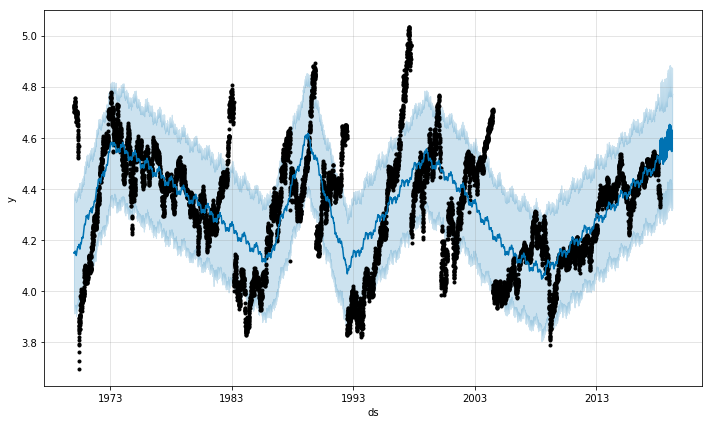

In [13]:
figure=model.plot(forecast)

# below is optional - If you want to plot y intercepts on the graph. 
#
#xcoords = model.changepoints
#for xc in xcoords:
#    plt.axvline(x=xc)

Black line/dot = Actual data
Blue line/dots = Forecast.
Jumps in the graphs indicate stock splits

/Users/ABC/miniconda3/envs/venv3.6/lib/python3.6/site-packages/fbprophet/forecaster.py:1010: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = seasonal_features.as_matrix()


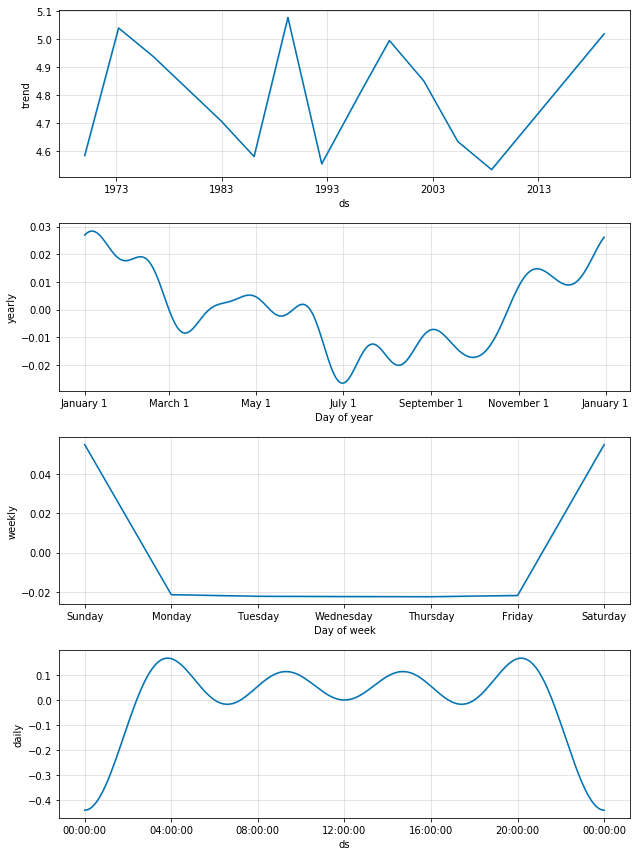

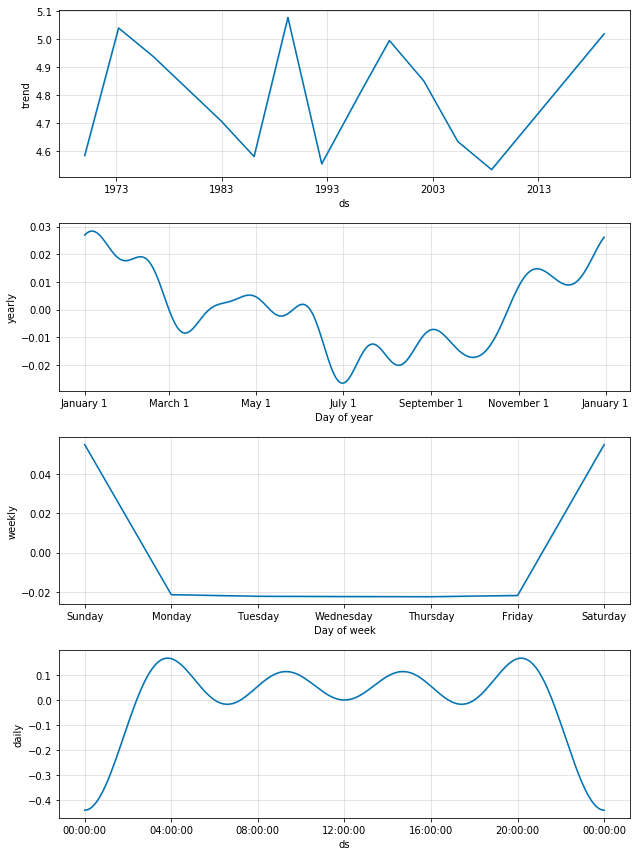

In [14]:
model.plot_components(forecast)

No clear conclusions here.

Daily vs ds plot

Daily data indicates hegihtened impacts over the weekends, but markets are closed over the weekends. Some after hours trading does happen, but nothing generally significant. Most importantly, activity during weekdays is flat 

Yearly vs ds plot

Seems like generally downward pressure on stock price in JFM , contrasted with upward pressure on price in OND for P&G.

In [15]:
#Trying to understand what the errors might be; let's focus on the past 3 years instead.

In [16]:
df_raw.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change
0,1970-01-02,109.50,110.25,109.37,110.00,26000.0,0.0,1.0,1.629834,1.640998,1.627899,1.637277,832000.0,1970-01-02,1.637277,0.007442
1,1970-01-05,110.00,110.75,109.37,110.50,16200.0,0.0,1.0,1.637277,1.648440,1.627899,1.644719,518400.0,1970-01-05,1.644719,0.007442
2,1970-01-06,110.25,110.25,109.25,110.00,15000.0,0.0,1.0,1.640998,1.640998,1.626113,1.637277,480000.0,1970-01-06,1.637277,-0.003721
3,1970-01-07,110.25,112.00,110.25,111.75,22200.0,0.0,1.0,1.640998,1.667045,1.640998,1.663324,710400.0,1970-01-07,1.663324,0.022326
4,1970-01-08,111.75,113.50,111.50,113.00,16600.0,0.0,1.0,1.663324,1.689372,1.659603,1.681930,531200.0,1970-01-08,1.681930,0.018605


In [17]:
df_raw2 = df_raw.rename(index=str, columns={"Close":"PG"})

In [18]:
df_raw2

,Date,Open,High,Low,PG,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change
0,1970-01-02,109.50,110.2500,109.3700,110.00,26000.0,0.0,1.0,1.629834,1.640998,1.627899,1.637277,832000.0,1970-01-02,1.637277,0.007442
1,1970-01-05,110.00,110.7500,109.3700,110.50,16200.0,0.0,1.0,1.637277,1.648440,1.627899,1.644719,518400.0,1970-01-05,1.644719,0.007442
2,1970-01-06,110.25,110.2500,109.2500,110.00,15000.0,0.0,1.0,1.640998,1.640998,1.626113,1.637277,480000.0,1970-01-06,1.637277,-0.003721
3,1970-01-07,110.25,112.0000,110.2500,111.75,22200.0,0.0,1.0,1.640998,1.667045,1.640998,1.663324,710400.0,1970-01-07,1.663324,0.022326
4,1970-01-08,111.75,113.5000,111.5000,113.00,16600.0,0.0,1.0,1.663324,1.689372,1.659603,1.681930,531200.0,1970-01-08,1.681930,0.018605
5,1970-01-09,113.00,113.0000,112.2500,112.75,8200.0,0.0,1.0,1.681930,1.681930,1.670766,1.678209,262400.0,1970-01-09,1.678209,-0.003721
6,1970-01-12,112.75,112.7500,112.0000,112.00,11600.0,0.0,1.0,1.678209,1.678209,1.667045,1.667045,371200.0,1970-01-12,1.667045,-0.011163
7,1970-01-13,112.00,112.2500,111.5000,111.50,12800.0,0.0,1.0,1.667045,1.670766,1.659603,1.659603,409600.0,1970-01-13,1.659603,-0.007442
8,1970-01-14,112.00,114.7500,112.0000,112.00,18600.0,0.0,1.0,1.667045,1.707977,1.667045,1.667045,595200.0,1970-01-14,1.667045,0.000000
9,1970-01-15,112.00,112.5000,111.7500,112.00,12200.0,0.0,1.0,1.667045,1.674487,1.663324,1.667045,390400.0,1970-01-15,1.667045,0.000000


In [19]:
df_raw3 = df_raw2[['Date', 'PG']]

In [20]:
df_raw3 = df_raw3.rename(columns={'Date':'ds'})

In [21]:
df_raw3 = df_raw3.set_index('ds')

In [22]:
df_raw3.head()

,PG
ds,
1970-01-02,110.00
1970-01-05,110.50
1970-01-06,110.00
1970-01-07,111.75
1970-01-08,113.00


In [23]:
threeyr_data = forecast.set_index('ds').join(df_raw3) # building the forecast model.
threeyr_data = threeyr_data[['PG', 'yhat', 'yhat_upper','yhat_lower']].dropna().tail(1200)# pick the last 1200 entries, instead of th entirety of history of the stock. Also drop any blank data or NA.

In [24]:
threeyr_data.head()

,PG,yhat,yhat_upper,yhat_lower
ds,,,,
2013-06-20,75.25,4.276568,4.482104,4.064167
2013-06-21,77.43,4.275750,4.504972,4.054370
2013-06-24,76.58,4.272449,4.498335,4.060328
2013-06-25,76.69,4.270656,4.486120,4.046656
2013-06-26,77.40,4.269713,4.497901,4.036197


In [25]:
threeyr_data.tail()

,PG,yhat,yhat_upper,yhat_lower
ds,,,,
2018-03-21,77.04,4.504851,4.726305,4.280414
2018-03-22,76.41,4.505554,4.729770,4.274472
2018-03-23,75.91,4.506966,4.727073,4.292351
2018-03-26,76.41,4.509671,4.734604,4.298914
2018-03-27,77.79,4.509553,4.739608,4.276744


In [26]:
threeyr_data['yhat']= np.exp(threeyr_data.yhat) #where exp is the exponential function. earlier we used logarithm to base e to get the predicted
threeyr_data['yhat_upper'] = np.exp(threeyr_data.yhat_upper) #  y values. Now we're bringing them up to predicted price value (dollars)
threeyr_data['yhat_lower'] = np.exp(threeyr_data.yhat_lower) 

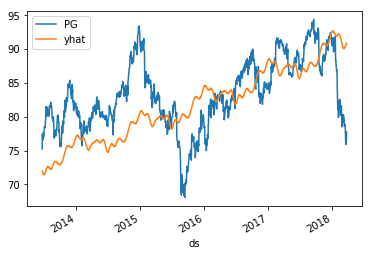

In [27]:
threeyr_data[['PG', 'yhat']].plot()

Actual prices in blue
Predicted prices in Orange

We could annalyse this further, but it's clear to see that the past 3 years experienced too much volatility.
Looking at the initial graphs, it seems the last stock split was in 2004 (21st June 2004 to be precise.)
After trying a few different starting points, I elected to limit going back to 10 years and start in 09 to cut out too much noise. This is still 2300 data points.
So, let's train a new model going back to 2010 

In [28]:
nostocksplits_data = forecast.set_index('ds').join(df_raw3) # building the forecast model.
nostocksplits_data = nostocksplits_data[['PG', 'yhat', 'yhat_upper','yhat_lower']].dropna().tail(2300)# pick the last 2300 entries

In [29]:
nostocksplits_data.head()

,PG,yhat,yhat_upper,yhat_lower
ds,,,,
2009-02-05,53.32,4.113026,4.349728,3.885237
2009-02-06,54.00,4.113956,4.327307,3.879206
2009-02-09,52.94,4.115053,4.338116,3.905575
2009-02-10,51.45,4.114326,4.320594,3.890560
2009-02-11,51.16,4.114199,4.333588,3.903314


In [30]:
nostocksplits_data['yhat']= np.exp(nostocksplits_data.yhat) #where exp is the exponential function
nostocksplits_data['yhat_upper'] = np.exp(nostocksplits_data.yhat_upper) 
nostocksplits_data['yhat_lower'] = np.exp(nostocksplits_data.yhat_lower) 

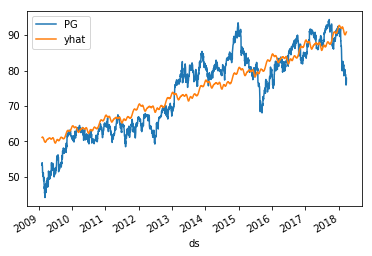

In [31]:
nostocksplits_data[['PG', 'yhat']].plot()

Actual prices in blue. Prediction in orange.

## Basic Stats workup

In [32]:
#to get an idea of how much data is missing. We should have 2018 Mar - 2009 Feb = 109 months of data. But below, we only have 77 rows. We're missing about 20 months of data; 20% gaps (on a daily basis)
nostocksplits_data.iloc[::7]

,PG,yhat,yhat_upper,yhat_lower
ds,,,,
2009-02-05,53.32,61.131427,77.457370,48.678499
2009-02-17,50.11,61.069444,75.635220,48.932683
2009-02-26,48.97,60.427457,75.271119,48.198717
2009-03-09,44.18,59.844919,74.300644,47.688313
2009-03-18,48.02,59.913694,74.065378,48.936788
2009-03-27,48.57,60.352581,74.842268,48.369670
2009-04-07,48.68,60.610677,76.415484,48.943687
2009-04-17,51.66,60.804041,76.095769,48.176651
2009-04-28,49.69,60.949549,75.432625,49.227778


In [33]:
#Average error over the past 13 years
tenyr_ae = (nostocksplits_data.yhat - nostocksplits_data.PG)
print (tenyr_ae.describe())

count    2300.000000
mean        0.684804
std         5.177933
min       -13.360072
25%        -3.611289
50%         1.260002
75%         3.902519
max        15.664919
dtype: float64


In [34]:
#The numbers are not too bad; the forecasts on average deviate from the actual prices by ~20 cents, and a maximum (absolute) of 15 dollars at one point.
# Let's deeper dive into the numbers.

In [35]:
#r2 comparisons
metrics.r2_score(nostocksplits_data.PG, nostocksplits_data.yhat)

0.8005463860827133

In [36]:
#R2 values less at 80 indicate an adequate model. We could improve the values with a tighter window,, but that's not the point here. An 80% score over 10 years is something I can work with.

In [37]:
#explained variance regression score - Indexes the variance (square of standard deviation) of the difference between the forecast and actual data, with the variance of the actual data. Best possible score is 1.0; lower is worse.
metrics.explained_variance_score(nostocksplits_data.PG, nostocksplits_data.yhat)

0.8039765588514094

In [38]:
# Mean Absolute Error is the measurement of absolute error between two continuous variables. 
metrics.mean_absolute_error(nostocksplits_data.PG, nostocksplits_data.yhat)

4.283357506106596

In [39]:
#medians are more robust to outliers. The loss is calculated by taking the median of all absolute differences between the target and the prediction.
metrics.median_absolute_error(nostocksplits_data.PG, nostocksplits_data.yhat)


3.759057926074501

The median error between forecast and actual prices was 3.76 dollars. Not fantastic, but good enough to make long term plays on, given 3.76 dollars is roughly 3.76% of a stock price trending close to 100.

## Finishing up

Text(0.5,0,'Date')

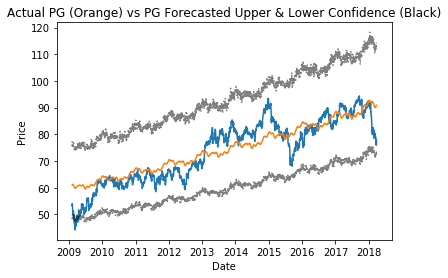

In [40]:
fig, ax1 = plt.subplots()
ax1.plot(nostocksplits_data.PG)
ax1.plot(nostocksplits_data.yhat)
ax1.plot(nostocksplits_data.yhat_upper, color='black',  linestyle=':', alpha=0.5)
ax1.plot(nostocksplits_data.yhat_lower, color='black',  linestyle=':', alpha=0.5)

ax1.set_title('Actual PG (Orange) vs PG Forecasted Upper & Lower Confidence (Black)')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

In [41]:
# Not exactly useful for intraday trading, but long term, even with lower confidence bounds, it seems 
# the trend is high and to the right, based on day-to-day price changes for the stock.

In [42]:
df_raw_noss = df_pro.tail(2300) #no stock split dataset for date and price only

In [43]:
df_raw_noss

,ds,Open,High,Low,y,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close
9868,2009-02-05,52.29,53.6000,52.1300,3.976311,17727500.0,0.0,1.0,39.634893,40.627850,39.513616,40.415615
9869,2009-02-06,53.42,54.4600,53.0600,3.988984,15338000.0,0.0,1.0,40.491413,41.279715,40.218540,40.931043
9870,2009-02-09,53.89,53.9800,52.6700,3.969159,13422200.0,0.0,1.0,40.847665,40.915883,39.922927,40.127582
9871,2009-02-10,52.74,53.4600,50.9700,3.940610,22520700.0,0.0,1.0,39.975985,40.521733,38.634357,38.998188
9872,2009-02-11,51.85,51.9078,50.8600,3.934958,16404400.0,0.0,1.0,39.301381,39.345192,38.550979,38.778373
9873,2009-02-12,50.93,51.4000,49.9500,3.937301,18019300.0,0.0,1.0,38.604037,38.960289,37.861215,38.869331
9874,2009-02-13,51.37,51.6800,50.7300,3.933589,11644800.0,0.0,1.0,38.937550,39.172524,38.452441,38.725315
9875,2009-02-17,50.00,50.9400,49.2800,3.914221,20833900.0,0.0,1.0,37.899114,38.611617,37.353367,37.982492
9876,2009-02-18,49.84,51.1700,49.7500,3.930845,16755100.0,0.0,1.0,37.777837,38.785953,37.709618,38.619197
9877,2009-02-19,51.50,52.0500,51.0300,3.934371,13503700.0,0.0,1.0,39.036087,39.452977,38.679836,38.755634


In [44]:
df_raw4 = df_raw3.tail(2300)

In [45]:
# we have to build a new set of predictive models since we're only looking at the past 10 years now.

model1 = Prophet(daily_seasonality = True, n_changepoints = 12) #specifying daily seasonality to see if there's any effect. This can be tweaked to weekly, or even monthly, if needed.
model1.fit(df_raw_noss)
future1 = model1.make_future_dataframe(periods=365) # forecasting for 1 year from now.
forecast1 = model1.predict(future1) #training the forecast model

/Users/ABC/miniconda3/envs/venv3.6/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/Users/ABC/miniconda3/envs/venv3.6/lib/python3.6/site-packages/fbprophet/forecaster.py:1010: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = seasonal_features.as_matrix()
/Users/ABC/miniconda3/envs/venv3.6/lib/python3.6/site-packages/fbprophet/forecaster.py:1134: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  seasonal = np.matmul(seasonal_features.as_matrix(), beta) * self.y_scale


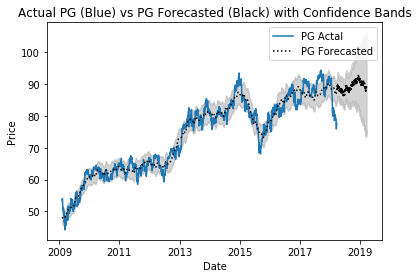

In [113]:
#We've come this far, let's see what the model predicts anyway for the future, based on the past 10 years
full_df = forecast1.set_index('ds').join(df_raw4) #using the newly trained forecast1 model.
full_df['yhat']=np.exp(full_df['yhat'])

fig, ax1 = plt.subplots()
ax1.plot(full_df.PG)
ax1.plot(full_df.yhat, color='black', linestyle=':')
ax1.fill_between(full_df.index, np.exp(full_df['yhat_upper']), np.exp(full_df['yhat_lower']), alpha=0.5, color='darkgray')
ax1.set_title('Actual PG (Blue) vs PG Forecasted (Black) with Confidence Bands')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

L=ax1.legend() #get the legend
L.get_texts()[0].set_text('PG Actal') #change the legend text for 1st plot
L.get_texts()[1].set_text('PG Forecasted') #change the legend text for 2nd plot

In [47]:
full_df.tail()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,seasonal,seasonal_lower,...,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat,PG
ds,,,,,,,,,,,,,,,,,,,,,
2019-03-23,4.580293,4.312051,4.654807,4.407265,4.742249,-0.085352,-0.085352,-0.085352,-0.085943,-0.085943,...,-0.085943,-0.085943,0.010669,0.010669,0.010669,-0.011261,-0.011261,-0.011261,89.509906,NaN
2019-03-24,4.580325,4.323318,4.666058,4.406447,4.743287,-0.085352,-0.085352,-0.085352,-0.084851,-0.084851,...,-0.084851,-0.084851,0.010669,0.010669,0.010669,-0.010168,-0.010168,-0.010168,89.610680,NaN
2019-03-25,4.580358,4.302213,4.650014,4.404259,4.744298,-0.085352,-0.085352,-0.085352,-0.098497,-0.098497,...,-0.098497,-0.098497,-0.004144,-0.004144,-0.004144,-0.009001,-0.009001,-0.009001,88.399047,NaN
2019-03-26,4.580391,4.302732,4.651318,4.401953,4.745142,-0.085352,-0.085352,-0.085352,-0.097027,-0.097027,...,-0.097027,-0.097027,-0.003895,-0.003895,-0.003895,-0.007781,-0.007781,-0.007781,88.531929,NaN
2019-03-27,4.580423,4.301452,4.644245,4.400501,4.745986,-0.085352,-0.085352,-0.085352,-0.096270,-0.096270,...,-0.096270,-0.096270,-0.004390,-0.004390,-0.004390,-0.006529,-0.006529,-0.006529,88.601885,NaN


In [48]:
predicted_prices = full_df
predicted_prices['yhat_upper'] = np.exp(full_df.yhat_upper) 
predicted_prices['yhat_lower'] = np.exp(full_df.yhat_lower) 

predicted_prices.tail()


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,seasonal,seasonal_lower,...,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat,PG
ds,,,,,,,,,,,,,,,,,,,,,
2019-03-23,4.580293,74.593295,105.088913,4.407265,4.742249,-0.085352,-0.085352,-0.085352,-0.085943,-0.085943,...,-0.085943,-0.085943,0.010669,0.010669,0.010669,-0.011261,-0.011261,-0.011261,89.509906,NaN
2019-03-24,4.580325,75.438500,106.277988,4.406447,4.743287,-0.085352,-0.085352,-0.085352,-0.084851,-0.084851,...,-0.084851,-0.084851,0.010669,0.010669,0.010669,-0.010168,-0.010168,-0.010168,89.610680,NaN
2019-03-25,4.580358,73.863061,104.586411,4.404259,4.744298,-0.085352,-0.085352,-0.085352,-0.098497,-0.098497,...,-0.098497,-0.098497,-0.004144,-0.004144,-0.004144,-0.009001,-0.009001,-0.009001,88.399047,NaN
2019-03-26,4.580391,73.901381,104.722952,4.401953,4.745142,-0.085352,-0.085352,-0.085352,-0.097027,-0.097027,...,-0.097027,-0.097027,-0.003895,-0.003895,-0.003895,-0.007781,-0.007781,-0.007781,88.531929,NaN
2019-03-27,4.580423,73.806902,103.984798,4.400501,4.745986,-0.085352,-0.085352,-0.085352,-0.096270,-0.096270,...,-0.096270,-0.096270,-0.004390,-0.004390,-0.004390,-0.006529,-0.006529,-0.006529,88.601885,NaN


## Conclusion (Prophet)

For the P&G stock price on 23rd March '19. Between 88 and 90 dollars is the target price prediction.

# ARIMA model

# ARIMA stands for Autoregressive Integrated Moving Average. Autoregressive models use previous values as predictors depending upon the form of the model and forecasts based on previous values,
### and are generally the benchmark for regression models. 

In [49]:
df_pro.head()

,ds,Open,High,Low,y,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close
0,1970-01-02,109.50,110.25,109.37,4.700480,26000.0,0.0,1.0,1.629834,1.640998,1.627899,1.637277
1,1970-01-05,110.00,110.75,109.37,4.705016,16200.0,0.0,1.0,1.637277,1.648440,1.627899,1.644719
2,1970-01-06,110.25,110.25,109.25,4.700480,15000.0,0.0,1.0,1.640998,1.640998,1.626113,1.637277
3,1970-01-07,110.25,112.00,110.25,4.716264,22200.0,0.0,1.0,1.640998,1.667045,1.640998,1.663324
4,1970-01-08,111.75,113.50,111.50,4.727388,16600.0,0.0,1.0,1.663324,1.689372,1.659603,1.681930


In [94]:
df_arima = df_raw3

In [51]:
df_arima.head()

,PG
ds,
1970-01-02,110.00
1970-01-05,110.50
1970-01-06,110.00
1970-01-07,111.75
1970-01-08,113.00


In [88]:
df_arima.tail()

,PG
ds,
2018-03-21,77.04
2018-03-22,76.41
2018-03-23,75.91
2018-03-26,76.41
2018-03-27,77.79


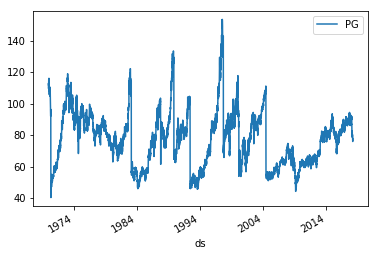

In [52]:
from matplotlib import pyplot
df_arima.plot()
pyplot.show()

In [53]:
## Taking a quick initial look at autocorrelation plots for the graph

/Users/ABC/miniconda3/envs/venv3.6/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  from ipykernel import kernelapp as app


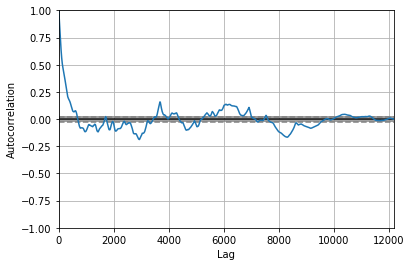

In [54]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df_arima)
pyplot.show()

In [55]:
### weak cyclical pattern observed. stronger correlation for first ~400 lags (above the no-correlation confidence intervals)
### The first 100-200 lags are more signifcant, so they may be a good starting point.

In [56]:
# Building the ARIMA model
from statsmodels.tsa.arima_model import ARIMA 
#for the dataframe df_arima
# fit model
model = ARIMA(df_arima, order=(5,1,0)) #sets the lag value to 5 for autoregression, uses a diff order of 1 to make the time series statinoary, and uses a moving avg model of 0
model_fit = model.fit(disp=0)
print(model_fit.summary())


/Users/ABC/miniconda3/envs/venv3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/ABC/miniconda3/envs/venv3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                   D.PG   No. Observations:                12167
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -23920.000
Method:                       css-mle   S.D. of innovations              1.728
Date:                Tue, 29 May 2018   AIC                          47854.000
Time:                        12:46:03   BIC                          47905.845
Sample:                             1   HQIC                         47871.379
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0027      0.015     -0.180      0.857      -0.032       0.026
ar.L1.D.PG    -0.0008      0.009     -0.089      0.929      -0.019       0.017
ar.L2.D.PG    -0.0188      0.009     -2.077      0.0

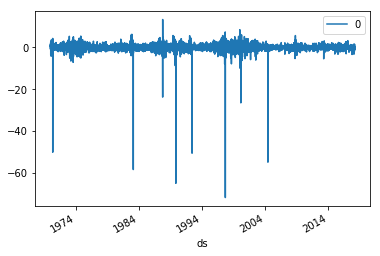

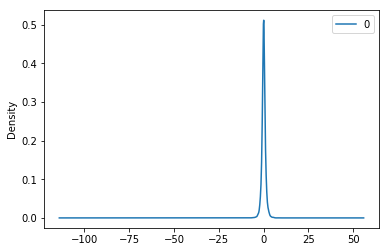

                  0
count  12167.000000
mean       0.000009
std        1.728192
min      -71.560680
25%       -0.485499
50%        0.010328
75%        0.525424
max       13.345798


In [57]:
from pandas import DataFrame
#plotting the residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [ ]:
# Strong residual errors where we had stock splits.

In [58]:
df_arima.shape

(12168, 1)

In [59]:
model_fit

In [ ]:
# Similar to for prophet, let's only use the last 2300 values for the dataframe.

predicted=85.510841, expected=86.260000
predicted=86.212109, expected=85.210000
predicted=85.333631, expected=84.870000
predicted=84.899451, expected=85.390000
predicted=85.366493, expected=85.500000
predicted=85.592939, expected=85.460000
predicted=85.493067, expected=85.170000
predicted=85.179835, expected=85.130000
predicted=85.146994, expected=85.410000
predicted=85.426993, expected=85.160000
predicted=85.221326, expected=84.350000
predicted=84.415787, expected=84.630000
predicted=84.617708, expected=82.660000
predicted=82.853476, expected=83.090000
predicted=83.091875, expected=81.540000
predicted=81.719361, expected=81.390000
predicted=81.485337, expected=82.090000
predicted=82.084826, expected=81.830000
predicted=81.974001, expected=83.560000
predicted=83.446928, expected=82.850000
predicted=82.920470, expected=83.750000
predicted=83.658494, expected=83.380000
predicted=83.366792, expected=84.740000
predicted=84.673592, expected=84.860000
predicted=84.866818, expected=83.920000


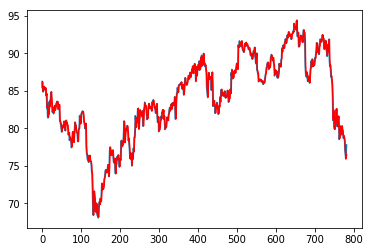

In [64]:
from sklearn.metrics import mean_squared_error
X = df_arima.values                         # set X as the name of the dataframe in question
size = int(len(X) * 0.66)                   # setting up 66% train and 33% test sets 
train, test = X[0:size], X[size:len(X)]     #
history = [x for x in train]                 
#history = train
predictions = list()                        
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

#plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
# Picking values for p and q in the ARIMA model

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff(), nlags=20)
lag_pacf = pacf(ts_log_diff(), nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [95]:
df_arima_09 = df_arima.tail(2300)

In [96]:
#Now, we simply use all the data for the past ~10 years to train, and generate the coming 365 days of price data.

from sklearn.metrics import mean_squared_error
X = df_arima_09.values                         # set X as the name of the dataframe in question
train = X     
history = [x for x in train]                 
#history = train
predictions = history     
PG_365days = list()
for i in range(365):
    model = ARIMA(predictions, order=(4,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    PG_365days.append(yhat)
    #obs = test[t]
    #history.append(obs)
    print('predicted=%f, day=%f' % (yhat, i))
error = mean_squared_error(train, predictions)
print('Test MSE: %.3f' % error)

#plot
#pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=77.747708, day=0.000000
predicted=77.707842, day=1.000000
predicted=77.651931, day=2.000000
predicted=77.628073, day=3.000000
predicted=77.615088, day=4.000000
predicted=77.606079, day=5.000000
predicted=77.597532, day=6.000000
predicted=77.588845, day=7.000000
predicted=77.580013, day=8.000000
predicted=77.571126, day=9.000000
predicted=77.562234, day=10.000000
predicted=77.553353, day=11.000000
predicted=77.544486, day=12.000000
predicted=77.535631, day=13.000000
predicted=77.526789, day=14.000000
predicted=77.517957, day=15.000000
predicted=77.509138, day=16.000000
predicted=77.500330, day=17.000000
predicted=77.491533, day=18.000000
predicted=77.482747, day=19.000000
predicted=77.473973, day=20.000000
predicted=77.465211, day=21.000000
predicted=77.456460, day=22.000000
predicted=77.447720, day=23.000000
predicted=77.438991, day=24.000000
predicted=77.430271, day=25.000000
predicted=77.421566, day=26.000000
predicted=77.412871, day=27.000000
predicted=77.404190, day=28.00

ValueError: Found input variables with inconsistent numbers of samples: [2300, 2665]

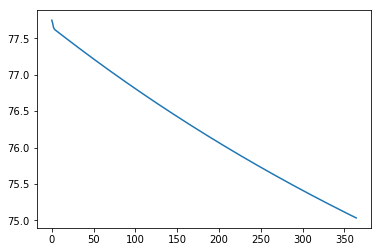

In [97]:
plt.plot(PG_365days)

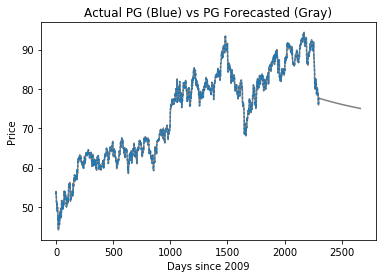

In [120]:
fig2, ax2 = plt.subplots()
ax2.plot(predictions, color = 'gray')
ax2.plot(train, linestyle=':')
ax2.set_title('Actual PG (Blue) vs PG Forecasted (Gray)')
ax2.set_ylabel('Price')
ax2.set_xlabel('Days since 2009')

L=ax1.legend() #get the legend
L.get_texts()[0].set_text('PG Actal') #change the legend text for 1st plot
L.get_texts()[1].set_text('PG Forecasted') #change the legend text for 2nd plot

## Thanks to

In [ ]:
ericbrown - https://github.com/urgedata
Facebook Core Data Science team
towardsdatascience.com
Jason Brownlee (PhD) and the machinelearningmastery.com website
Analyticsvidhya.com

## Appendix
### Or, code that is nice to have.

In [ ]:
# For the ARIMA model, after accounting for trends and seasonality (to make it a stationary model), the predictions became too conservative and essentially linear. The predicted price in a years time (21 March 2019)

In [ ]:
len(test)

#Setting the variables for the model
- Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
- Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
- Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

In [ ]:
df_arima.describe()

In [ ]:
df_arima.median()

In [ ]:
ts = df_arima

In [ ]:
ts_log = np.log(ts)

In [ ]:
plt.plot(ts_log, color = 'fuchsia')

In [ ]:
moving_avg = ts_log.rolling(window = 12).mean()
plt.plot(ts_log, color = 'fuchsia')
plt.plot(moving_avg, color = 'yellow')

In [ ]:
# Let's aim to make this time series stationary.
# The way to do that is by removing trends and seasonality.

In [ ]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

In [ ]:
ts_log_moving_avg_diff.dropna(inplace=True)

In [ ]:
# Testing for stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd =  timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    

In [ ]:
# For the Dickey Fuller test, we'll have to separate the dataset into a single array.

Dickey-Fuller Test: Statistical tests for stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for different confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [ ]:
ts_log_moving_avg_diff_dicky = ts_log_moving_avg_diff.iloc[:,0]

In [ ]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(ts_dicky, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
     dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Test statistic is smaller than 1% Critical value, so we can say with 99% confidence that this time seiries is staionary.

In [ ]:
ts_log.shift

In [ ]:
ts_log_diff = ts_log - ts_log.shift # difference between adjacent values

In [ ]:
ts_log_diff

In [ ]:
plt.plot(ts_log_diff())

In [ ]:
ts_log_diff()

In [ ]:
# p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=1.
# q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=1.

In [ ]:
#AR Model
model_AR = ARIMA(ts_log, order=(1, 1, 1))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff())
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff())**2))

In [ ]:
from sklearn.metrics import mean_squared_error
X = df_arima.values                         # set X as the name of the dataframe in question
size = int(len(X) * 0.66)                   # setting up 66% train and 33% test sets 
train, test = X[0:size], X[size:len(X)]     #
history = [x for x in train]     
predictions = list()
i = 0
for i in range(1, 365): #the next 365 days after the end of this current dataset
    model_2019 = ARIMA(history, order=(1,1,1))
    model_fit_2019 = model_2019.fit(disp=0)
    output_1 = model_fit_2019.forecast()
    yhat = output_1[0]
    history.append(yhat)
    #obs = test[t]
    #history.append(obs) --> Necessary for the ARIMA model to keep going because it's a daily occurence.
    print('predicted=%f, day=%f' % (yhat, i))
error = mean_squared_error(days, predictions)
print('Test MSE: %.3f' % error)

In [ ]:
output

In [ ]:
pyplot.plot(test, color = 'yellow')
pyplot.plot(predictions, color = 'black')

In [ ]:
pyplot.plot(predictions, color = 'green')

In [ ]:
predictions[0]

In [ ]:
# Following the Box-Jenkins methodology to fittting an ARIMA model.
# Model Identification
# Parameter estimation
# Model checking